In [3]:
import os
from pathlib import Path
from pyVICI.pyPlasma import *
from pyVICI.pyATT import *
import numpy as np
import matplotlib.pyplot as plt

## Defining the plasma and the equilibrium of interest

In [4]:
os.getcwd()

'/home/arthur/Programs/pyVICI/examples/OFEMIC'

In [5]:
#%% Plasma Definition
#====================

# Machine definition
#-------------------
f = 55e6 #driving frequency
freq = f
B0 = 3.7 #central magnetic field
R0 = 2.42 #machine center
a = 0.4511 #minor radius

# Maxwell caracteristics
#-----------------------
mu0 = 4*np.pi*1e-7
eps0 = 8.854e-12

om=2*np.pi*freq
k0=om*np.sqrt(mu0*eps0)
lambda0 = 2*np.pi/k0

# Plasma profile
#---------------
dirname = os.getcwd()
filename1 = Path(f'{dirname}/../../data/WEST_data/WEST_ICRH_Profile_56898_t6s.txt') #where to put images
data = np.loadtxt(filename1, comments='%')

x_sol = -np.flipud(data[:, 0]) + 2.98092482 # profile radial description
ne_sol = np.flipud(data[:, 1])/1e6 # density radial description (in m-3)
ne_sol[ne_sol<1e8] = 1e8 # to avoid too low, unphysical densities
Te_sol = np.flipud(data[:, 2]) # electron temperature radial profile
Te_sol[Te_sol<1] = 1 # avoid Te=0K
Ti_sol = (Te_sol) # ion temperature radial profile

# xi = 3.004+0.02-0.4 #start (e.g. plasma center)
xi = 2.6
xfp = 3.004+0.02 #end (e.g. antenna position)
stepb = 1e-3 #number of steps considered

xspan = np.arange(xi, xfp+stepb, stepb)
xspan = np.round(xspan, 3)
nspan = np.interp(xspan, x_sol, ne_sol)
Bspan = B0 * R0 / xspan
Tespan = np.interp(xspan, x_sol, Te_sol)
Tispan = np.interp(xspan, x_sol, Ti_sol)

# Plasma species
#---------------
symbol=('e','H','D')
Z = (-1,1,1)
A = (0,1,2)
C = (1,0.05,0.95)
# nuom = np.ones(len(xspan))*1e-3
nuom = np.zeros((3))*1e-3

s = PlasmaSpecies(symbol, Z, A, C, nuom)

# Plasma definition
#------------------
plasma_west = Plasma(f,xspan,nspan,Bspan,Tespan,Tispan,s)
plasma_west.cold_plasma_dielectric()

  nx = 201, ny = 201
372
   => Resizing to 257 x 257
CURRENT:  -486029.6990126902
Plasma current: -486029.6990126902 Amps, input: -486089.4954 Amps
A : Coil(R=0.738, Z=0, current=-744460.5, turns=1, control=True)
Bh : Coil(R=1.118, Z=1.75, current=-1905043.3, turns=1, control=True)
Dh : Coil(R=2.885, Z=1.92, current=109602.4, turns=1, control=True)
Eh : Coil(R=3.77, Z=1.523, current=38774.6, turns=1, control=True)
Fh : Coil(R=4.375, Z=0.637, current=100633.5, turns=1, control=True)
Fb : Coil(R=4.375, Z=-0.637, current=3378.4, turns=1, control=True)
Eb : Coil(R=3.77, Z=-1.523, current=205970.5, turns=1, control=True)
Db : Coil(R=2.885, Z=-1.92, current=-12768.6, turns=1, control=True)
Bb : Coil(R=1.118, Z=-1.75, current=-1224636.5, turns=1, control=True)
divh : Circuit([("Xh1", Coil(R=2.0115, Z=0.7432, current=-22279.1, turns=1, control=True), 1.0), ("Xh2", Coil(R=2.0755, Z=0.7772, current=-22279.1, turns=1, control=True), 1.0), ("Xh3", Coil(R=2.1665, Z=0.8058, current=-22279.1, turns=1

<Figure size 640x480 with 0 Axes>

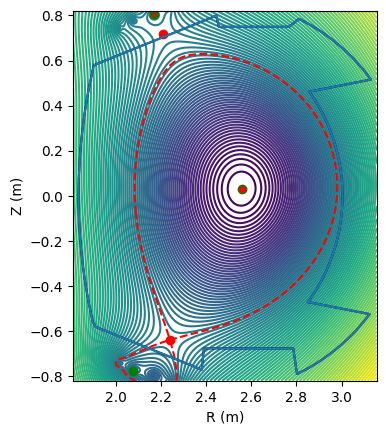

In [6]:
#%% West 2D equilibrium reading
#==============================

new=1
if new:
    dirname = os.getcwd() 
    wall_file = Path(f'{dirname}/../../data/WEST_data/WEST56898_t6_equilibrium_data.mat')
    # equilibrium_file = 'data/WEST_data/WEST_ref/WEST57885_time6_Equilibrium.geqdsk'
    # equilibrium_file = 'data/WEST_data/WEST_ref/WEST57888_time6_Equilibrium.geqdsk'
    # equilibrium_file = 'data/WEST_data/WEST_ref/WEST57892_time6_Equilibrium.geqdsk'
    equilibrium_file = Path(f'{dirname}/../../data/WEST_data/geqdsk_56898_6_201x201')
    tokamak, eq, Rsep, Zsep, Rwall, Zwall = create_tokamak(west_coils,wall_file,equilibrium_file)
    

#% Plotting
#----------
plt.figure()
axis = eq.plot(show=False)
plt.plot(axis=axis)
plt.plot(Rwall,Zwall)
plt.plot(eq.magneticAxis()[0],eq.magneticAxis()[1],'r*')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:14: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_17899/37419508.py:14: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('$\Psi$ (T m$^2$)')
/tmp/ipykernel_17899/37419508.py:34: SyntaxWarning: invalid escape sequence '\P'
  plt.title('$\Psi$ (T m$^2$)')


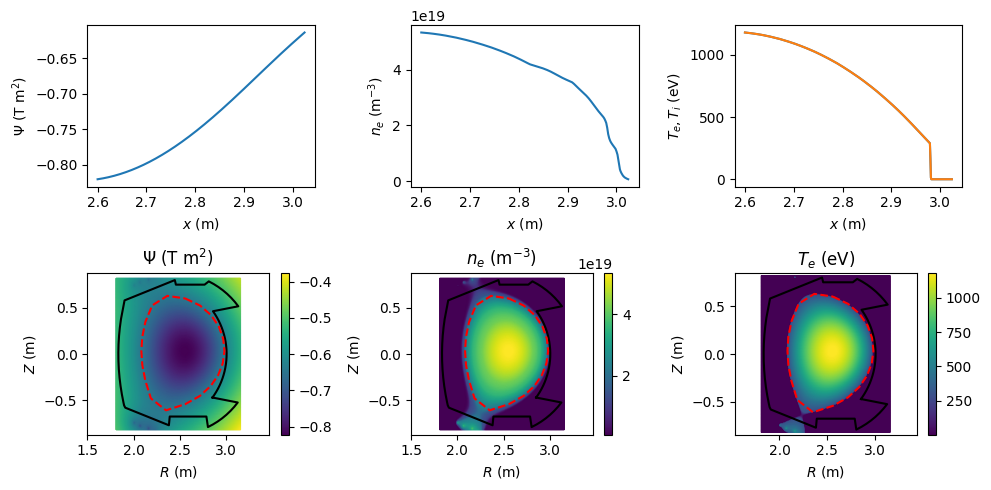

In [7]:
# WEST 2D equilibrium
#--------------------
R = eq.R
Z = eq.Z
west_2Dmap = Plasma_map2D(plasma_west, eq, R, Z)

# 2D Plot of plasma properties
#-----------------------------
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(xspan,west_2Dmap.Psi_1D)
# plt.plot(xspan,eq.psiRZ(xspan,eq.magneticAxis()[1]))
plt.xlabel('$x$ (m)')
plt.ylabel('$\Psi$ (T m$^2$)')

plt.subplot(2,3,2)
plt.plot(xspan,nspan*1e6)
plt.xlabel('$x$ (m)')
plt.ylabel('$n_e$ (m$^{-3}$)')

plt.subplot(2,3,3)
plt.plot(xspan,Tespan)
plt.plot(xspan,Tispan)
plt.xlabel('$x$ (m)')
plt.ylabel('$T_e, T_i$ (eV)')

plt.subplot(2,3,4)
sc=plt.pcolormesh(R,Z,eq.psiRZ(R,Z),shading='gouraud')
plt.colorbar(sc)
plt.plot(Rwall,Zwall,'k')
plt.plot(Rsep,Zsep,'--r')
plt.xlabel('$R$ (m)')
plt.ylabel('$Z$ (m)')
plt.title('$\Psi$ (T m$^2$)')
plt.axis('equal')
plt.tight_layout()

plt.subplot(2,3,5)
sc=plt.pcolormesh(R,Z,west_2Dmap.ne*1e6,shading='gouraud')
plt.colorbar(sc)
plt.plot(Rwall,Zwall,'k')
plt.plot(Rsep,Zsep,'--r')
plt.xlabel('$R$ (m)')
plt.ylabel('$Z$ (m)')
plt.title('$n_e$ (m$^{-3}$)')
plt.axis('equal')
plt.tight_layout()

plt.subplot(2,3,6)
sc=plt.pcolormesh(R,Z,west_2Dmap.Te,shading='gouraud')
plt.colorbar(sc)
plt.plot(Rwall,Zwall,'k')
plt.plot(Rsep,Zsep,'--r')
plt.xlabel('$R$ (m)')
plt.ylabel('$Z$ (m)')
plt.title('$T_e$ (eV)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Defining the Geometry and the FEM

Here I first extract important point of the WEST geometry.

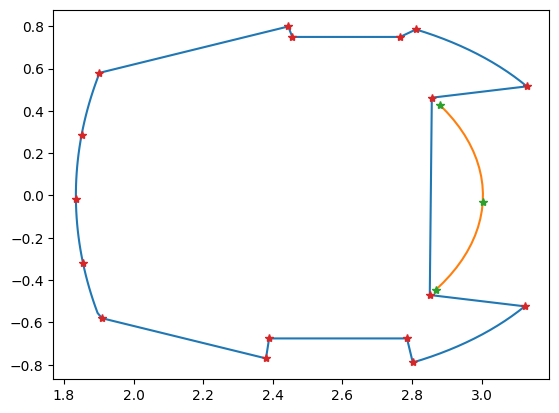

In [8]:
ii1 = np.abs(Zwall)<0.5
ii2 = np.abs(Rwall-2.96)<0.1
ii = ii1 & ii2
ii_out = ~ ii

plt.figure()
plt.plot(Rwall[ii_out],Zwall[ii_out])
plt.plot(Rwall[ii],Zwall[ii])

ilim = [0, 11, -1]
plt.plot(Rwall[ii][ilim],Zwall[ii][ilim],'*')

iwall = [1,2,16,17,27,28,50,60,70,80,89,114,115,124,125,139,140]
plt.plot(Rwall[ii_out][iwall],Zwall[ii_out][iwall],'*')
plt.show()


Then we define the intial mesh of the geometry

In [9]:
from ngsolve import *
import netgen.geom2d as geom2d
from ngsolve.webgui import Draw

geo = geom2d.SplineGeometry()
p2 = [geo.AppendPoint(x,y) for x,y in [(Rwall[ii_out][iwall][i],Zwall[ii_out][iwall][i]) for i in range(0,Rwall[ii_out][iwall].size)]]
p1 = [geo.AppendPoint(x,y) for x,y in [(Rwall[ii][ilim][i],Zwall[ii][ilim][i]) for i in range(0,Rwall[ii][ilim].size)]]

geo.Append(["spline3", p1[0], p1[1], p1[2]],bc='lim')
geo.Append(["line", p1[2], p2[0]],bc='wall')
[geo.Append (["line", p2[i], p2[i+1]],bc='wall') for i in range(0,Rwall[ii_out][iwall].size-1)]
geo.Append (["line", p2[-1], p1[0]],bc='wall')

mesh = Mesh(geo.GenerateMesh (maxh=0.16/4))
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

Defining the FEM. Here we use hybrid FEM.

In [13]:
order_mesh=6
V = HCurl(mesh, order=order_mesh, complex=True, dirichlet='lim|wall') #nedelec in plane
Q = H1(mesh, order=order_mesh-1, complex=True, dirichlet='lim|wall') #Lagrange 2 perp
fem = V*Q #fem space composed of these 2 space


et, ez = fem.TrialFunction()
vt, vz = fem.TestFunction()

normal = specialcf.normal(mesh.dim) #Normal vector

## FEM computation

Here I'm definig a hot tensor for the mode of interest.

In [14]:
# Mode number to analyze
m = 20
kz= m/R

# Cold plasma tensor
west_plasma2D = Plasma(freq,R,west_2Dmap.ne,west_2Dmap.btot,west_2Dmap.Te,west_2Dmap.Ti,s)
west_plasma2D.cold_plasma_dielectric()
west_plasma2D.approximate_roots(kz)

# For the hot tensor correction
n = 5 #harmonic number
psi = 0 #ratoi ky/kx
kperp = np.sqrt(west_plasma2D.kfast2)
west_plasma2D.hot_plasma_dielectric(kz, kperp, psi, n)
#west_plasma2D.tepid_plasma_dielectric(kz)
#west_plasma2D.cold_plasma_dielectric()


# 2x2 FW matrix
epsRZ11 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[0,0].T, linear=True)
epsRZ12 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[0,1].T, linear=True)
epsRZ21 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[1,0].T, linear=True)
epsRZ22 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[1,1].T, linear=True)
epsRZ = CF(((epsRZ11,epsRZ12),(epsRZ21,epsRZ22)), dims=(2,2))

# 1x1 FW/SW share
epsRZ31 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[2,0].T, linear=True)
epsRZ32 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[2,1].T, linear=True)

eps_perp = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[2,2].T, linear=True)
eps_perpRZ13 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon[0,2].T, linear=True)
eps_perpRZ23 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-
                                                  1,-1]), west_plasma2D.epsilon[1,2].T, linear=True)

# esptot
eps_tot = CF(((epsRZ11,epsRZ12,eps_perpRZ13),(epsRZ21,epsRZ22,eps_perpRZ23),(epsRZ31,epsRZ32,eps_perp)), dims=(3,3))

showplot=0
if showplot:
    Draw(epsRZ11.imag,mesh,wireframe=False)
    Draw(epsRZ11.real,mesh,wireframe=False)
    Draw(eps_perp.real,mesh,wireframe=False)
    Draw(eps_perp.imag,mesh,wireframe=False)


## Adaptative refinement

In [15]:
# Define an error
space_flux = HCurl(mesh, order=order_mesh-1, complex=True, dirichlet='lim|wall')
gf_flux = GridFunction(space_flux, "flux")

flux = gfsigma #error defined on the plane component of the E field
gf_flux.Set(flux)

err = (flux-gf_flux)*(flux-gf_flux)


# Compute error
eta2 = Integrate(err, mesh, VOL, element_wise=True)
print(np.abs(eta2))

# max error
maxerr = max(np.abs(eta2))
print ("maxerr = ", maxerr)

# Refinement
mesh.ngmesh.Elements2D().NumPy()["refine"] = np.abs(eta2.NumPy()) > 0.5*maxerr


[9.74748452e-07 6.56905429e-07 7.29256922e-07 ... 2.23130487e-05
 5.85399752e-04 9.94477383e-04]
maxerr =  2.1470911162972106


In [16]:
# Automatize

def SolveBVP():
    fem.Update()
    gfm.Update()
    a.Assemble()
    b.Assemble()

    source_bc = CF((0,10))
    gfsigma, gfu = gfm.components
    gfsigma.Set(source_bc, definedon=mesh.Boundaries("lim"))

    res = gfm.vec.CreateVector()
    res.data = b.vec - a.mat * gfm.vec
    gfm.vec.data += a.mat.Inverse(freedofs=fem.FreeDofs()) * res
    
    gfsigma, gfu = gfm.components

l = []    # l = list of estimated total error
def CalcError():

    # compute the flux:
    space_flux.Update()
    gf_flux.Update()

    flux = gfsigma
    #flux = gfu
    gf_flux.Set(flux)

    # compute estimator:
    err = (flux-gf_flux)*(flux-gf_flux)
    eta2 = Integrate(err, mesh, VOL, element_wise=True)
    
    maxerr = max(np.abs(eta2))
    l.append ((fem.ndof, sqrt(sum(eta2))))
    print("ndof =", fem.ndof, " maxerr =", maxerr)

    # mark for refinement (vectorized alternative)
    mesh.ngmesh.Elements2D().NumPy()["refine"] = np.abs(eta2.NumPy()) > 1e-4*maxerr


In [17]:
# refine
mesh.Refine()
Draw(mesh)

SolveBVP()
Draw (gfsigma, mesh,min=-5e1, max=5e1, animate_complex=False)
Draw (gfu, mesh, min=-2e1/100, max=2e1/100, animate_complex=False);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'sp…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'sp…

In [18]:
level = 0
while fem.ndof < 750000:
    SolveBVP()
    
    level = level + 1
    if level%5 == 0:
        print('adaptive step #', level)
        Draw(gfsigma,min=-mean, max=mean)
    
    CalcError()
    mesh.Refine()

SolveBVP()

ndof = 126192  maxerr = 23.05228618670719
ndof = 142936  maxerr = 4.501117776372979
ndof = 198069  maxerr = 0.19260275017734513
ndof = 365587  maxerr = 4.50920881848189
adaptive step # 5


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'sp…

ndof = 445225  maxerr = 0.07921475702765891


In [19]:
Draw (gfsigma, mesh,min=-mean, max=mean, animate_complex=True)
Draw (gfu, mesh, min=-2e1/100, max=2e1/100, animate_complex=True);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'sp…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'sp…

In [20]:
Draw (log(sqrt(gfsigma.real**2+gfsigma.imag**2)),mesh,min=0, max=5)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

## Post-processing fields in numpy

In [21]:
vertices = np.array([vertex.point for vertex in mesh.vertices])
Eperp = np.array([gfsigma(mesh(vertice[0],vertice[1])) for vertice in vertices])
Epar = np.array([gfu(mesh(vertice[0],vertice[1])) for vertice in vertices])
Etot = np.array((Eperp[:,0],Eperp[:,1],Epar))

epsilon_tot = np.array([eps_tot(mesh(vertice[0],vertice[1])) for vertice in vertices])
epsilon_tot = epsilon_tot.reshape(Epar.size,3,3)

epsilonA = 0.5*np.array([epsilon_tot[i] - np.conjugate(epsilon_tot[i].T) for i in range(Epar.size)])
epsilonA = epsilonA

Q = 0.5*om*eps0*np.array([np.conjugate(Etot[:,i])@epsilonA[i]@Etot[:,i] for i in range(Epar.size)])

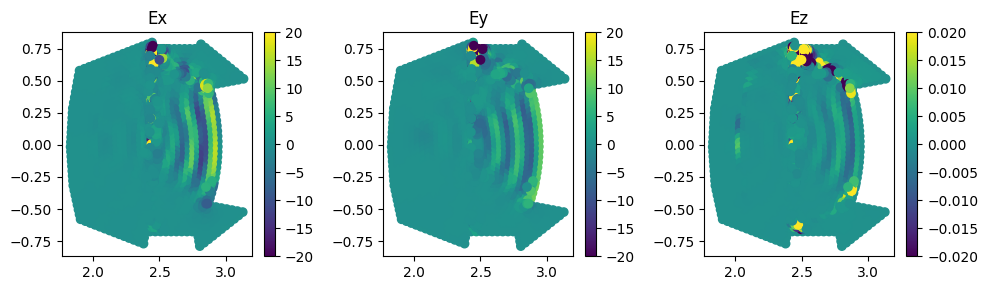

In [22]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.scatter(vertices[:,0],vertices[:,1],c=np.real(Eperp[:,0]))
plt.colorbar()
plt.clim(-mean,mean)
plt.title('Ex')

plt.subplot(132)
plt.scatter(vertices[:,0],vertices[:,1],c=np.real(Eperp[:,1]))
plt.colorbar()
plt.clim(-mean,mean)
plt.title('Ey')

plt.subplot(133)
plt.scatter(vertices[:,0],vertices[:,1],c=np.real(Epar))
plt.colorbar()
plt.clim(-mean/1e3,mean/1e3)
plt.title('Ez')
plt.tight_layout()
plt.show()

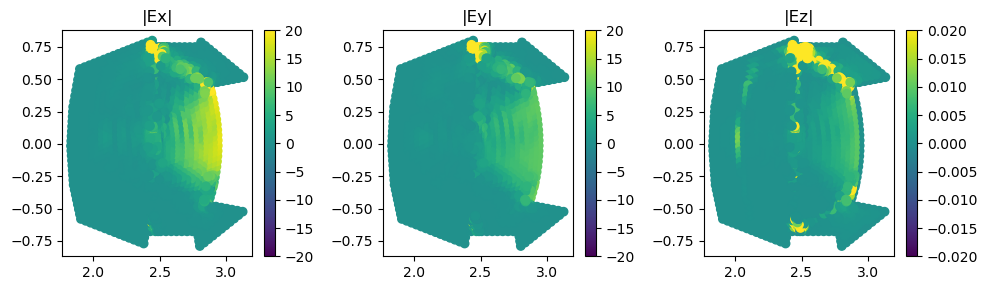

In [279]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.scatter(vertices[:,0],vertices[:,1],c=np.abs(Eperp[:,0]))
plt.colorbar()
plt.clim(-mean,mean)
plt.title('|Ex|')

plt.subplot(132)
plt.scatter(vertices[:,0],vertices[:,1],c=np.abs(Eperp[:,1]))
plt.colorbar()
plt.clim(-mean,mean)
plt.title('|Ey|')

plt.subplot(133)
plt.scatter(vertices[:,0],vertices[:,1],c=np.abs(Epar))
plt.colorbar()
plt.clim(-mean/1e3,mean/1e3)
plt.title('|Ez|')
plt.tight_layout()
plt.show()

/tmp/ipykernel_17899/2572789130.py:2: RuntimeWarning: divide by zero encountered in log10
  val = np.log10(np.imag(Q))
/tmp/ipykernel_17899/2572789130.py:2: RuntimeWarning: invalid value encountered in log10
  val = np.log10(np.imag(Q))


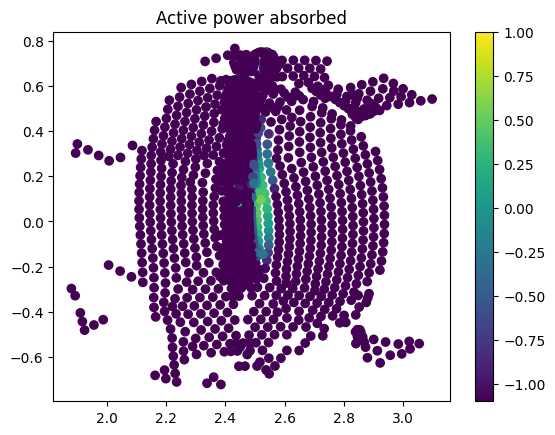

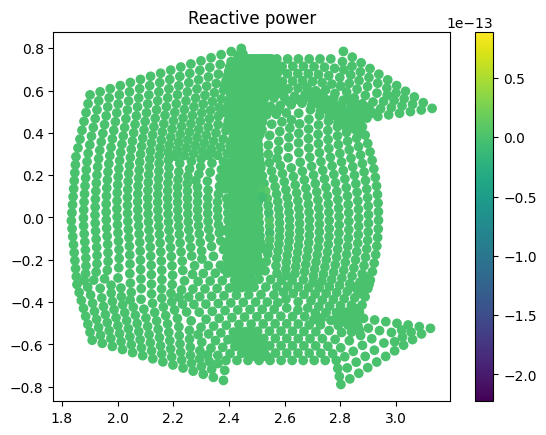

In [23]:
plt.figure()
val = np.log10(np.imag(Q))
#val = np.imag(Q)
plt.scatter(vertices[:,0],vertices[:,1],c=val)
plt.colorbar()
plt.title('Active power absorbed')
plt.clim(1,-1)

plt.figure()
val = np.real(Q)
plt.scatter(vertices[:,0],vertices[:,1],c=val)
plt.colorbar()
plt.title('Reactive power')
plt.show()

### Mapping the power absorbed Q to flux surfaces

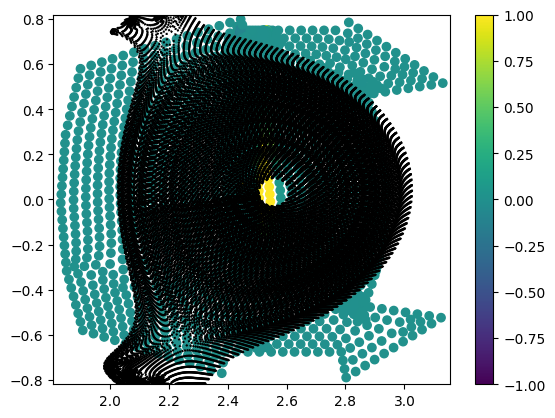

In [24]:
#Mapping Q
from scipy.interpolate import NearestNDInterpolator
Qmap = NearestNDInterpolator((vertices[:,0],vertices[:,1]),np.imag(Q))

plt.figure()
plt.scatter(vertices[:,0],vertices[:,1], c=np.imag(Q))
plt.colorbar()
plt.clim(-1,1)

level = eq.psiRZ(plasma_west.x,0)
cs = plt.contour(R,Z,west_2Dmap.eq.psiRZ(R,Z),levels=level, linestyles='dotted', colors='k')
paths = cs.get_paths()
level = cs.levels
plt.show()

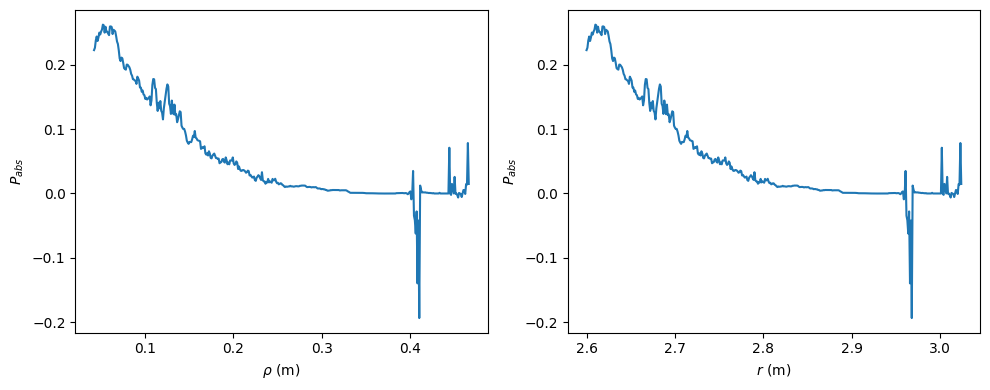

In [25]:
Qpsi = np.zeros(level.shape)
for i in range(0,level.size):
    Qpsi[i] = np.sum([Qmap(paths[i].vertices)*np.abs(np.gradient(np.sqrt(np.sum(paths[i].vertices**2,axis=1))))])

r = plasma_west.x
rho = r-eq.magneticAxis()[0]

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(rho, Qpsi)
plt.xlabel(r'$\rho$ (m)')
plt.ylabel('$P_{abs}$')

plt.subplot(122)
plt.plot(r, Qpsi)
plt.xlabel(r'$r$ (m)')
plt.ylabel('$P_{abs}$')
plt.tight_layout()
plt.show()

# Power absorbed per species

In [26]:
Qs = np.zeros((s.nb_species,)+Q.shape, 'complex')
Qpsis = np.zeros((s.nb_species,)+level.shape)

for i in range(s.nb_species):
    
    # 2x2 FW matrix
    epsRZ11 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[0,0,i].T, linear=True)
    epsRZ12 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[0,1,i].T, linear=True)
    epsRZ21 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[1,0,i].T, linear=True)
    epsRZ22 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[1,1,i].T, linear=True)
    epsRZ = CF(((epsRZ11,epsRZ12),(epsRZ21,epsRZ22)), dims=(2,2))
    
    # 1x1 FW/SW share
    epsRZ31 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[2,0,i].T, linear=True)
    epsRZ32 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[2,1,i].T, linear=True)
    
    eps_perp = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[2,2,i].T, linear=True)
    eps_perpRZ13 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[0,2,i].T, linear=True)
    eps_perpRZ23 = VoxelCoefficient((R[0,0],Z[0,0]), (R[-1,-1],Z[-1,-1]), west_plasma2D.epsilon_s[1,2,i].T, linear=True)
    
    # esptot
    eps_tot = CF(((epsRZ11,epsRZ12,eps_perpRZ13),(epsRZ21,epsRZ22,eps_perpRZ23),(epsRZ31,epsRZ32,eps_perp)), dims=(3,3))
    
    epsilon_tot = np.array([eps_tot(mesh(vertice[0],vertice[1])) for vertice in vertices])
    epsilon_tot = epsilon_tot.reshape(Epar.size,3,3)
    
    epsilonA = 0.5*np.array([epsilon_tot[i] - np.conjugate(epsilon_tot[i].T) for i in range(Epar.size)])
    epsilonA = epsilonA
    
    Qs[i] = 0.5*om*eps0*np.array([np.conjugate(Etot[:,i])@epsilonA[i]@Etot[:,i] for i in range(Epar.size)])

    Qmap = NearestNDInterpolator((vertices[:,0],vertices[:,1]),np.imag(Qs[i]))

    for j in range(1,level.size-1):
        Qpsis[i,j] = np.sum([Qmap(paths[j].vertices)*np.abs(np.gradient(np.sqrt(np.sum(paths[j].vertices**2,axis=1))))])

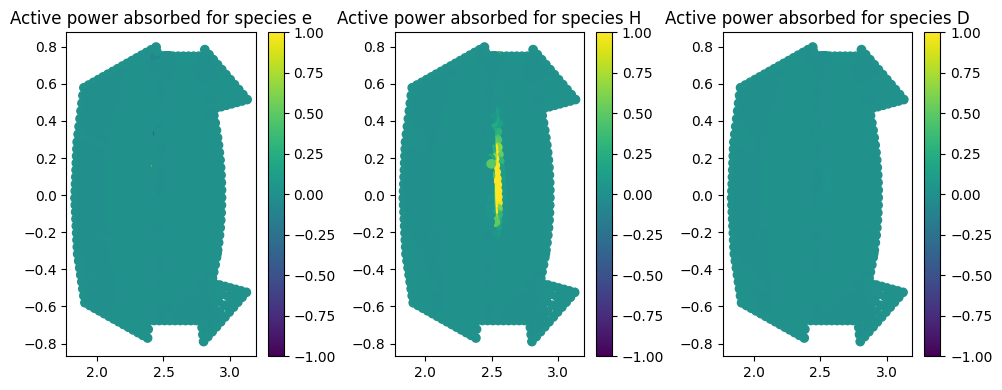

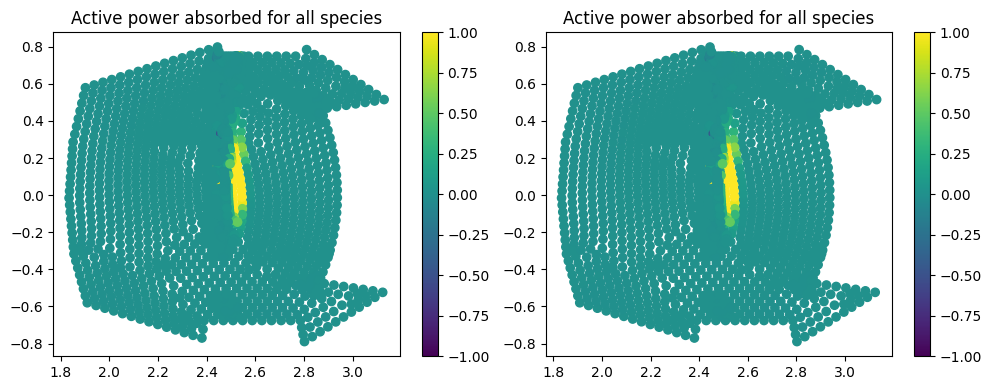

In [27]:
plt.figure(figsize=(10,4))
for i in range(s.nb_species):
    plt.subplot(1,s.nb_species,i+1)
    val = np.imag(Qs[i])
    plt.scatter(vertices[:,0],vertices[:,1],c=val)
    plt.colorbar()
    plt.title('Active power absorbed for species '+ s.symbol[i])
    plt.clim(-1,1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(121)
val = np.imag(Q)
val = np.imag(np.sum([Qs[i] for i in range(s.nb_species)],axis=0))
plt.scatter(vertices[:,0],vertices[:,1],c=val)
plt.colorbar()
plt.title('Active power absorbed for all species')
plt.clim(-1,1)
plt.tight_layout()

plt.subplot(122)
val = np.imag(Q)
plt.scatter(vertices[:,0],vertices[:,1],c=val)
plt.colorbar()
plt.title('Active power absorbed for all species')
plt.clim(-1,1)
plt.tight_layout()

plt.show()

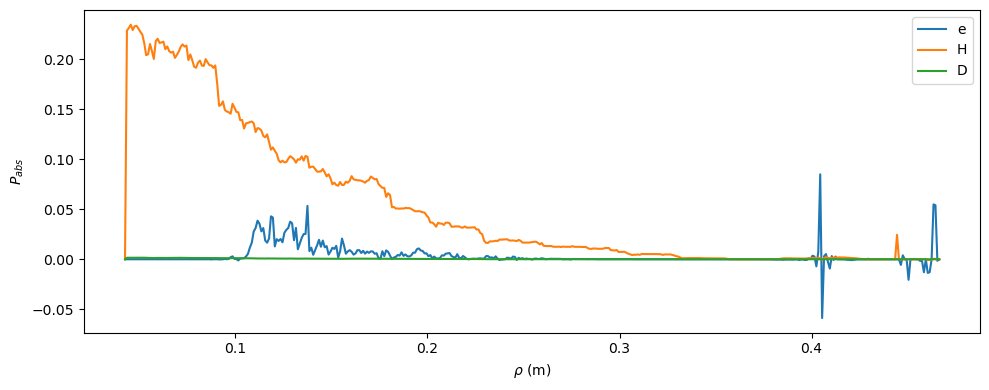

In [285]:
plt.figure(figsize=(10,4))
for i in range(s.nb_species):
    plt.plot(rho, Qpsis[i], label=s.symbol[i])
    plt.xlabel(r'$\rho$ (m)')
    plt.ylabel('$P_{abs}$')
plt.legend()
plt.tight_layout()
    

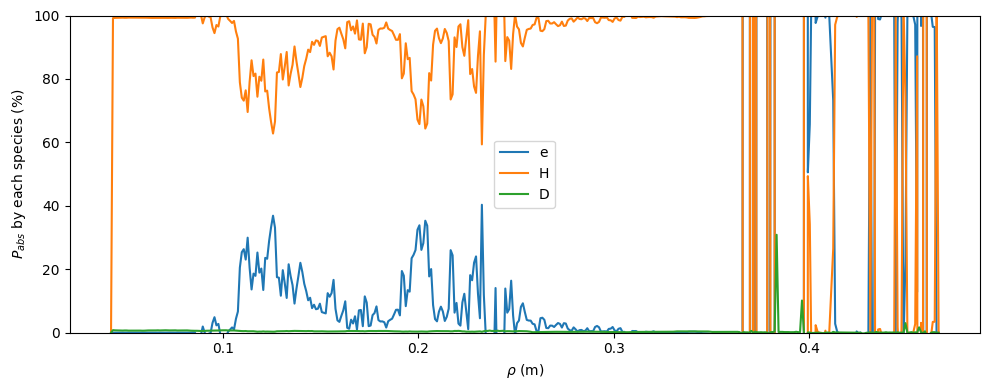

In [28]:
plt.figure(figsize=(10,4))
for i in range(s.nb_species):
    plt.plot(rho, Qpsis[i]/Qpsi*100, label=s.symbol[i])
    plt.xlabel(r'$\rho$ (m)')
    plt.ylabel('$P_{abs}$ by each species (%)')
    plt.ylim(0,100)
plt.legend()
plt.tight_layout()

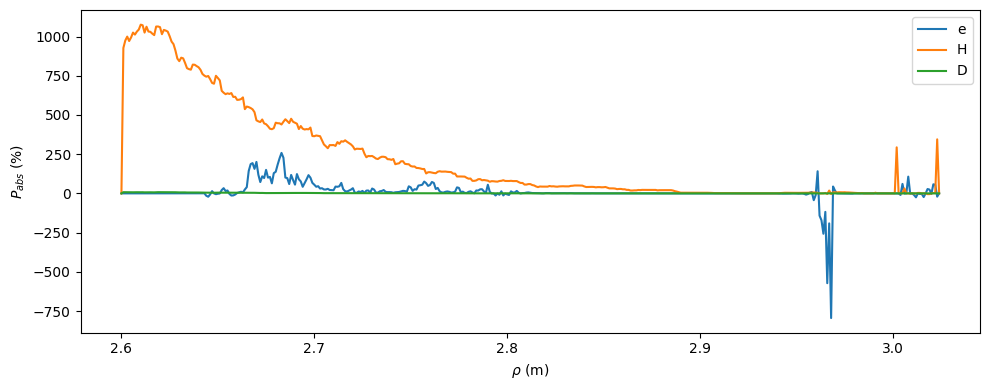

In [29]:
plt.figure(figsize=(10,4))
for i in range(s.nb_species):
    plt.plot(r, Qpsis[i]/np.sum(Qpsi*np.gradient(r))*100, label=s.symbol[i])
    plt.xlabel(r'$\rho$ (m)')
    plt.ylabel('$P_{abs}$ (%)')
    #plt.ylim(0,10)
plt.legend()
plt.tight_layout()